In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# read the data

In [2]:
d=pd.read_csv("C://Users//Hp//Downloads//50_Startups.csv")
d

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
# droping catogarical column
d=d.drop(columns = 'State')
d.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


This data set in the Profit is traget variable and features varibles are R&D Spend,Administration,Marketing Spend

# data processing (EDA)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In this data set there is no null values

In [5]:
# check for missing values
d.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

This data set in the Profit is traget varible and features varibles are R&D Spend,Administration,Marketing Spend,State

In [6]:
d.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [7]:
d.shape

(50, 4)

In [8]:
d.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
d=d.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKS'},axis=1)
d

,RDS,ADM,MKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
d.describe()

,RDS,ADM,MKS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


 # correlation Matrix
 correlation between indipendent variables Marketing _spend and is comparing

In [11]:
d.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


This data set is heighly correlative between profit and R&D Spend(Research and devolop spend in the past few years) we can say that  as R&D Spend increases profit increases

# Scatterplot between variables along with histograms

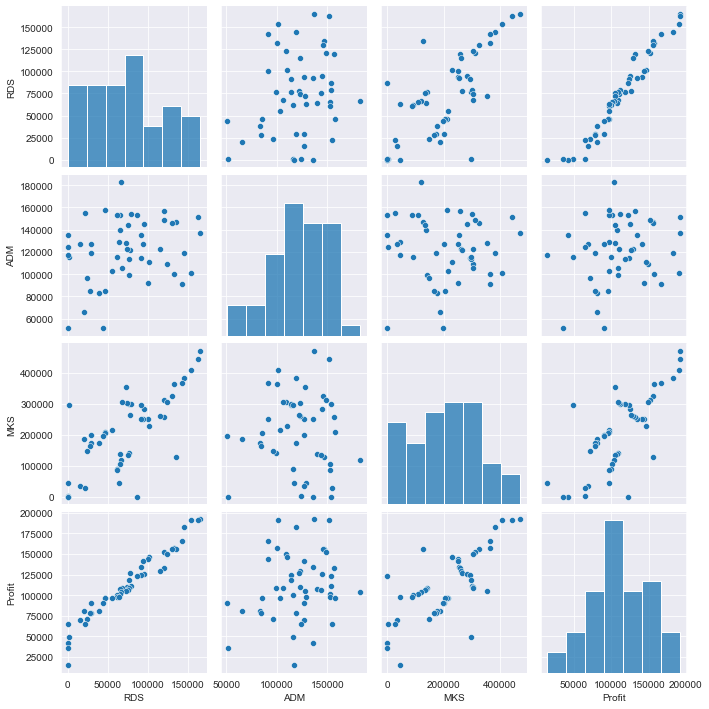

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(d)

# Taking tranfromations

In [20]:
x1=d['RDS']
x2=d['ADM']
x3=d['MKS']
y=d['Profit']

In [21]:
variable={'No Transformation':{'x1':x1,'x2':x2,'x3':x3,'y':y},
         'Square_Root_x_y':{'x1':np.sqrt(x1),'x2':np.sqrt(x2),'x3':np.sqrt(x3),'y':np.sqrt(y)},
         'Square_Root_Trans_x':{'x1':np.sqrt(x1),'x2':np.sqrt(x2),'x3':np.sqrt(x3),'y':y},
         'Square_Root_Trans_y':{'x1':x1,'x2':x2,'x3':x3,'y':np.sqrt(y)}}

In [23]:
r_square=[]
r_square_adj=[]
MSE=[]
for key,val in variable.items():
    print('\033[1m' + '\033[4m' + key,":" + '\033[0m',"\n\n")
    x1=val['x1']
    x2=val['x2']
    x3=val['x3']
    y=val['y']
    
    model1=smf.ols('y~x1+x2+x3',data=d).fit()
    print(model1.summary(),'\n\n')
    
    r_square.append(model1.rsquared)
    r_square_adj.append(model1.rsquared_adj)
    MSE.append(model1.mse_model)

No Transformation : 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        11:43:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.

the tranfromations is having the higest Rsquare hence we are going further with no transfromation model

In [77]:
best = pd.DataFrame(variable.get("No Transformation"))
model_best = smf.ols("y~x1+x2+x3", data=best).fit()
print('\033[1m' + '\033[4m' + "No Transformation:" + '\033[0m',"\n\n")
print(model_best.summary())

No Transformation: 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        12:16:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.3

# preparing a model

In [24]:
# Build model
import statsmodels.formula.api as smf
model=smf.ols('Profit~RDS+ADM+MKS',data=d).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        11:44:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Finding Coefficient parameters

In [25]:
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [26]:
# t and p-values
print(model.tvalues,'\n',np.round(model.pvalues,5))

Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MKS           1.655077
dtype: float64 
 Intercept    0.00000
RDS          0.00000
ADM          0.60176
MKS          0.10472
dtype: float64


Finding Coefficient of the ADM and MKS is actually is hieght so they are not good

In [27]:
# R squared values ,rsquared _adj 
(model.rsquared,model.rsquared_adj) 

(0.9507459940683246, 0.9475337762901719)

R squared adjacent value is 0.94 hence we can say that model is really good

In [ ]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

# simple linear Regression Models

In [31]:
slr_A=smf.ols('Profit~ADM',data=d).fit()

# t and p-values

print(slr_A.tvalues,'\n',slr_A.pvalues)  # ADM has in significant pvalues

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [32]:
slr_M=smf.ols('Profit~MKS',data=d).fit()

# t and p-values

print(slr_M.tvalues,'\n',slr_M.pvalues)  # MKS Has significant P values

Intercept    7.808356
MKS          7.802657
dtype: float64 
 Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64


# Multilinear Regression Models

In [33]:
mlr_am=smf.ols('Profit~ADM+MKS',data=d).fit()

mlr_am.tvalues, mlr_am.pvalues # varaibles have significant p values

(Intercept    1.142741
 ADM          2.467779
 MKS          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADM          1.729198e-02
 MKS          9.727245e-11
 dtype: float64)

 # Model Validation
# Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [34]:
rsq_rd=smf.ols("RDS~ADM+MKS",data=d).fit().rsquared
vif_rd=1/(1-rsq_rd)
rsq_admin=smf.ols("ADM~RDS+MKS",data=d).fit().rsquared
vif_admin=1/(1-rsq_admin)
rsq_mark=smf.ols("MKS~ADM+RDS",data=d).fit().rsquared
vif_mark=1/(1-rsq_mark)
vif={'variables':['RDS','ADM','MKS'],'VIF':[vif_rd,vif_admin,vif_mark]}
vif_df=pd.DataFrame(vif)
vif_df

,variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


Here all VIF variables value are not greater than 20, so we can say that there is no MultiCollinearity so we will consider all varaibles in Regression equation

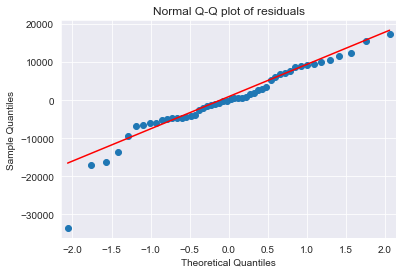

In [35]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')# line =45 to draw the diagnol line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [36]:
list(np.where(model.resid<-30000))
# outlier value exists below -3000 so that we use  (model.resid<-30000) 

[array([49], dtype=int64)]

In [37]:
 residuals=model.resid
 residuals  

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

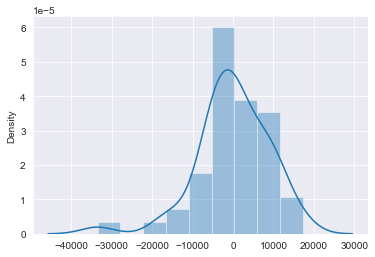

In [38]:
sns.distplot(residuals)

The residuals are left skewed 

# Residual plot for Homoscedasticity

In [39]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

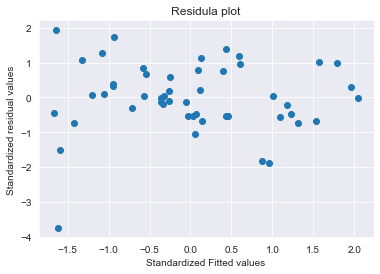

In [40]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residula plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals Vs Regressors

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

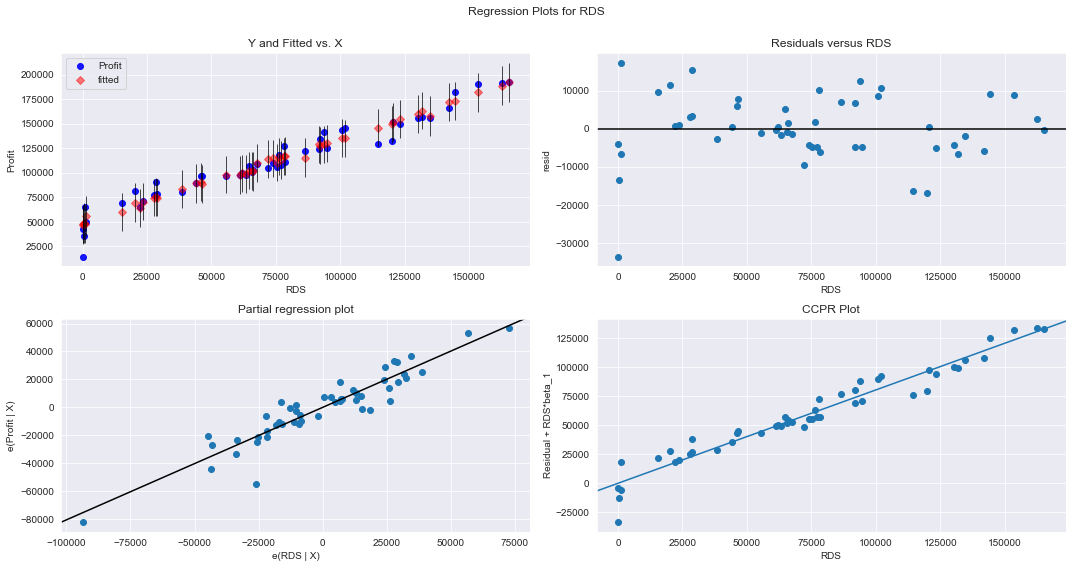

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

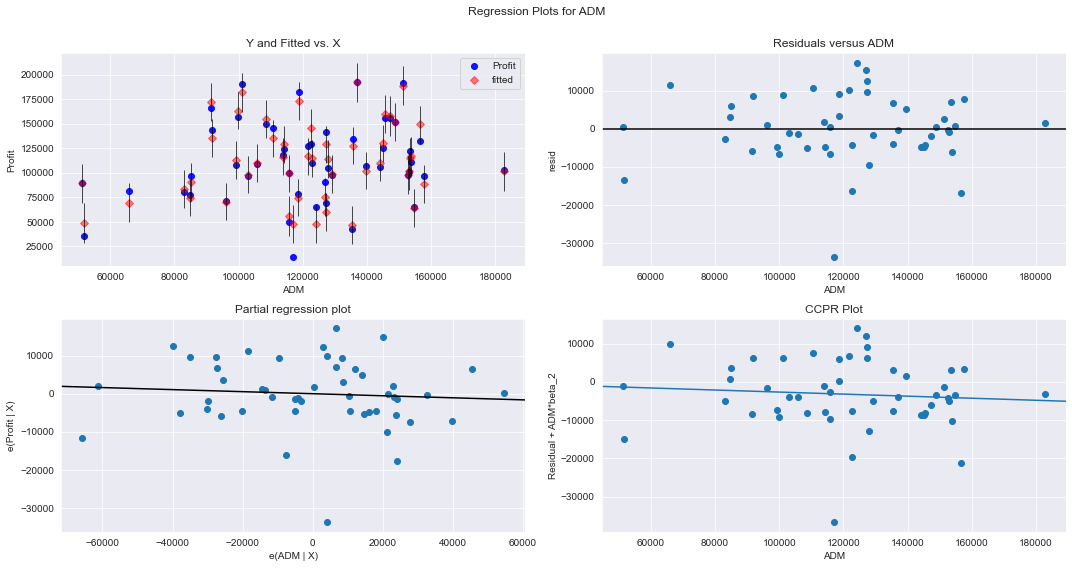

In [42]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show

eval_env: 1


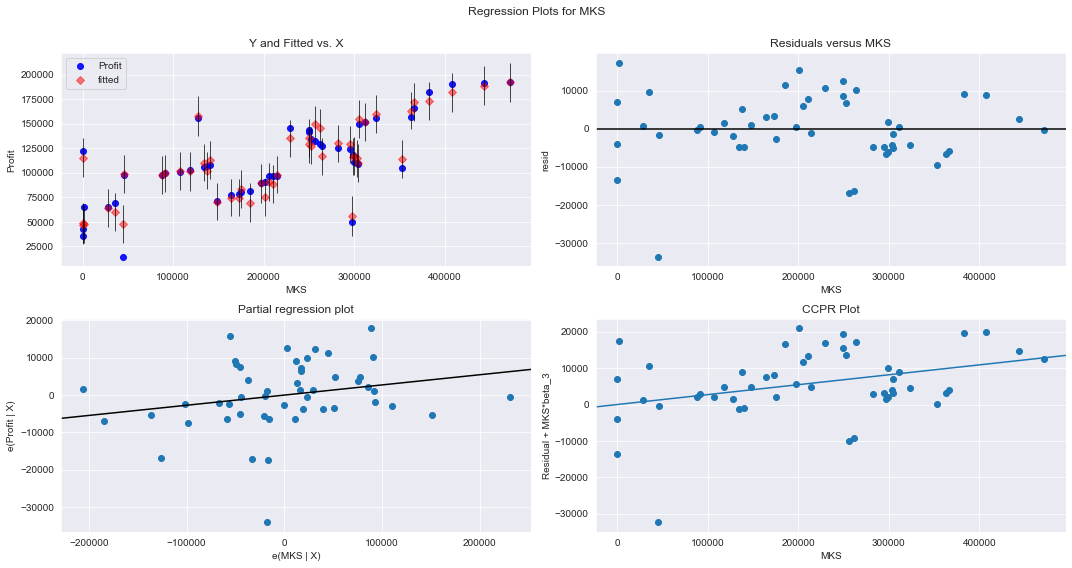

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

In [44]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

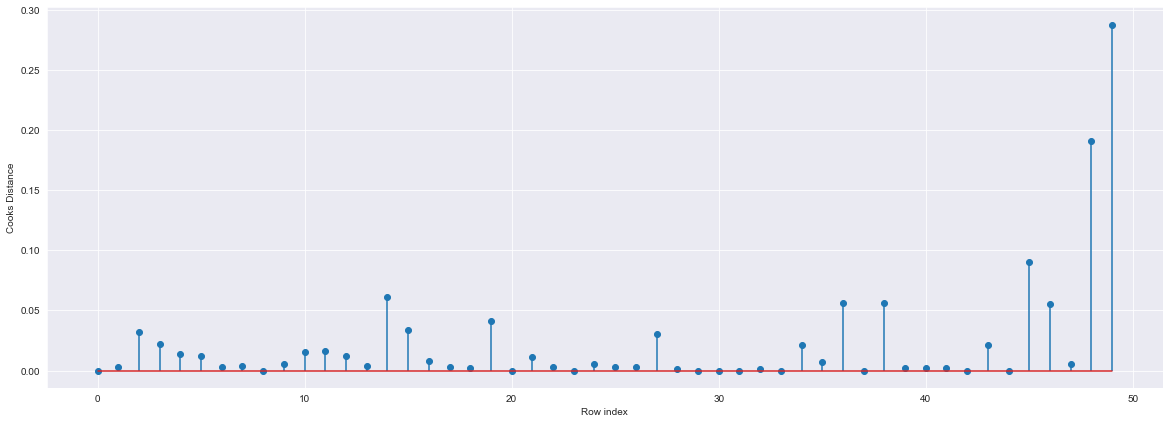

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(d)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
# index and value of influencer  where c is more than 5

(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

since the values is <1 ,we can stop the diagnostic process and finalize the mode

In [47]:
d.shape

(50, 4)

In [48]:
k = d.shape[1]
n = d.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

# 2. Leverage Value using High Influence Points

<Figure size 1800x720 with 0 Axes>

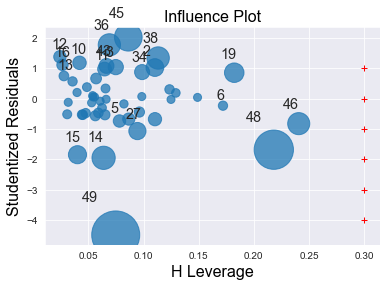

In [49]:
# Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
influence_plot(model,alpha=0.5)

y=[i for  i in range(-4,2)]
x=[leverage_cutoff for i in range(6)]
plt.plot(x,y,'r+')
plt.show()


In [50]:
# Most influensing DataPoint

In [51]:
d[d.index.isin([49])]

,RDS,ADM,MKS,Profit
49,0.0,116983.8,45173.06,14681.4


In [52]:
d.head()

,RDS,ADM,MKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [53]:
# Droping the influensing DataPoint

In [54]:
d_drp=d.drop(d.index[49],axis=0).reset_index()

d_drp.tail()

,index,RDS,ADM,MKS,Profit
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,46,1315.46,115816.21,297114.46,49490.75
47,47,0.00,135426.92,0.00,42559.73
48,48,542.05,51743.15,0.00,35673.41


In [55]:
d_drp

,index,RDS,ADM,MKS,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [56]:
d_new=d_drp.drop(['index'], axis=1)
d_new

,RDS,ADM,MKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Buliding reggresioin model after removing most influencing DataPoint

In [57]:
model2=smf.ols('Profit~RDS+ADM+MKS',data=d_new).fit()

In [58]:
model2_values=(model2.rsquared,model2.rsquared_adj,model2.aic)
model2_values

(0.9613162435129847, 0.9587373264138503, 1020.5652974526367)

# Improving the model

In [59]:
# again checing for influencing point by cook's distance

In [60]:
model2_influence = model2.get_influence()
(c2, _) = model2_influence.cooks_distance

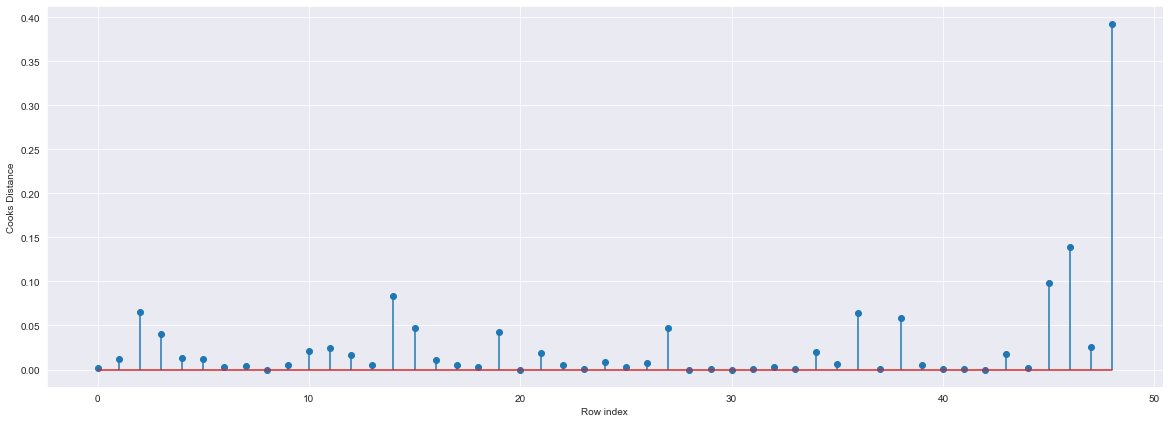

In [61]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(d_new)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
# index and value of influencer  where c is more than 5

(np.argmax(c2),np.max(c2))

(48, 0.39274420556321527)

In [63]:
# Now we want to drop 48 observation
d_new2=d_new.drop(d_new.index[48],axis=0).reset_index()

d_new2.tail()

,index,RDS,ADM,MKS,Profit
43,43,15505.73,127382.30,35534.17,69758.98
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,46,1315.46,115816.21,297114.46,49490.75
47,47,0.00,135426.92,0.00,42559.73


In [64]:
d_new3=d_new2.reset_index()

In [65]:
d_new4=d_new3.drop(['index'],axis=1)
d_new4

,level_0,RDS,ADM,MKS,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [66]:
d_new4=d_new4.drop(['level_0'],axis=1)
d_new4

,RDS,ADM,MKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [67]:
model3=smf.ols("Profit~RDS+ADM+MKS",data=d_new4).fit()
model3_values=(model3.rsquared,model3.rsquared_adj,model3.aic)
model3_values

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

In [68]:
# again checing for influencing point by cook's distance

In [69]:
model3_influence = model3.get_influence()
(c3, _) = model3_influence.cooks_distance

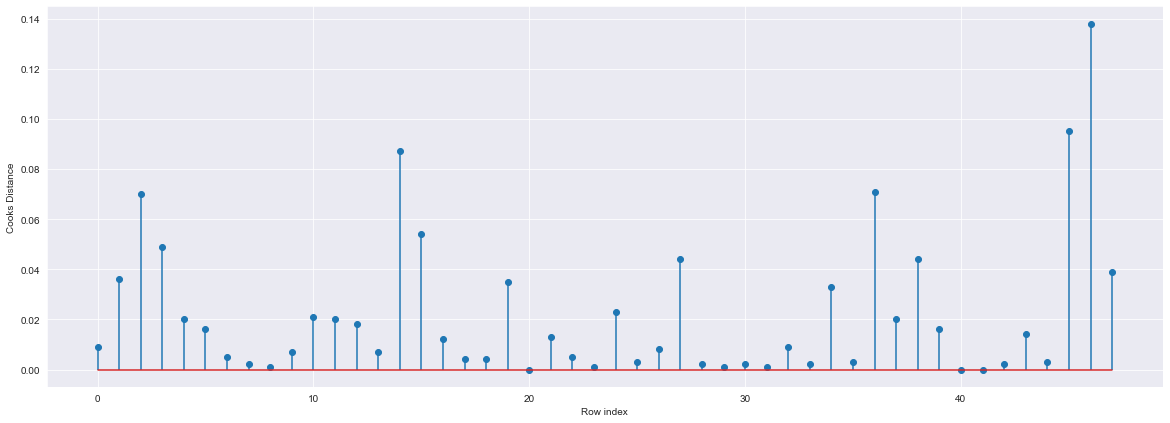

In [70]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(d_new4)), np.round(c3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
# index and value of influencer  where c is more than 5

(np.argmax(c3),np.max(c3))

(46, 0.13829133994334708)

### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [72]:
(model3.rsquared,model3.aic)

(0.9626766170294073, 994.6690439260116)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RDS', ylabel='Profit'>

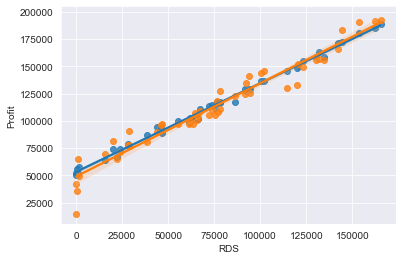

In [73]:
sns.regplot(d.RDS,model3.predict(d))
sns.regplot(d.RDS,d.Profit)

In [74]:
pred_y=model3.predict(d)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
48     56248.562734
49     52450.878563


## Predicting for New Data 

In [75]:
#New data for prediction
new_data=pd.DataFrame({"RDS":82471,"ADM":114562,"MKS":228985},index=[1])
new_data

,RDS,ADM,MKS
1,82471,114562,228985


In [76]:
pred_y=model3.predict(new_data)
pred_y

1    120820.232224
dtype: float64

This is a predicted value for another observation i am getting from my final model.